# Notebook for the cell-cell interaction research of fetal stem cells with liana package
- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Date:** 20th November 2023

### Import required modules

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import liana as li
import anndata as ad

### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                         10.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.1
brotli                      1.1.0
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.1.4
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
exceptiongroup              1.1.3
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
get_annotations             NA
h5py                        3.10.0
idna                        3.4
importlib_resources         NA
ipykernel                   6.26.0
isodurati

In [4]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data Upload

In [6]:
input_path = 'FetalSC_data/Fetal_healthy_stem_cells_leiden.h5ad'
adata = sc.read_h5ad(input_path)

In [8]:
adata

AnnData object with n_obs × n_vars = 7817 × 19868
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels', 'n_genes', 'n_counts', 'leiden', 'cluster'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0', 'n_counts', 'n_cells'
    uns: 'Age_colors', 'Age_group_colors', 'Donor_ID_colors', 'Library_Preparation_Protocol_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

In [9]:
X_is_raw(adata)

True

In [10]:
# Save raw counts in raw
adata.raw = adata

### Preprocess data

In [11]:
sc.pp.normalize_total(adata, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['DEFA5', 'DEFA6', 'FTL', 'MALAT1', 'MT-ATP6', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND3', 'MT-ND4', 'MT-ND4L', 'MTRNR2L12', 'NEAT1', 'SST']
    finished (0:00:00)


### Liana Run

In [12]:
# import all individual methods
import liana 
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [13]:
# Run rank_aggregate
li.mt.rank_aggregate(adata, groupby='cluster', expr_prop=0.1, verbose=True)

Using `.raw`!
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `consensus`.
0.23 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 7817 samples and 19868 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
Assuming that counts were `natural` log-normalized!


/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:246: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Running CellPhoneDB


100%|████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 386.11it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.33it/s]


In [14]:
adata.uns['liana_res'].head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
1468,FXYD3+_CKB+_SC,RPS10+_RPS17+_SC,APP,RPSA,5.658970,0.000,29.321508,0.229171,0.235176,0.137361,0.897893,0.307771,0.000,0.047812,6.616368e-09
2463,FXYD3+_CKB+_SC,FXYD3+_CKB+_SC,APP,RPSA,5.682145,0.000,29.507607,0.242322,0.087351,0.138233,0.898183,0.304930,0.000,0.171984,2.909849e-08
658,FXYD3+_CKB+_SC,MTRNR2L12+ASS1+_SC,APP,RPSA,5.556137,0.000,28.495747,0.170816,0.006732,0.133492,0.896576,0.303299,0.000,0.314988,9.816238e-08
2273,RPS10+_RPS17+_SC,FXYD3+_CKB+_SC,MDK,NCL,5.034478,0.000,25.243244,0.252207,1.123974,0.151150,0.890821,0.265050,0.000,0.013719,6.017366e-07
937,MTRNR2L12+ASS1+_SC,RPS10+_RPS17+_SC,APP,RPSA,5.076297,0.333,20.811131,0.012620,-0.117510,0.097493,0.881071,0.240008,0.055,1.000000,1.857182e-06


In [15]:
#Write anndata object to file
adata.write('FetalSC_data/FetalSC_liana/FetalSC_liana_aggregated.h5ad')

In [16]:
adata.obs['cluster'].value_counts()

cluster
MTRNR2L12+ASS1+_SC    3979
RPS10+_RPS17+_SC      3544
FXYD3+_CKB+_SC         294
Name: count, dtype: int64

In [18]:
# Extract all values from neuronal.obs['Cell States'] into list
cell_states = []
for i in adata.obs['cluster']:
    cell_states.append(i)

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


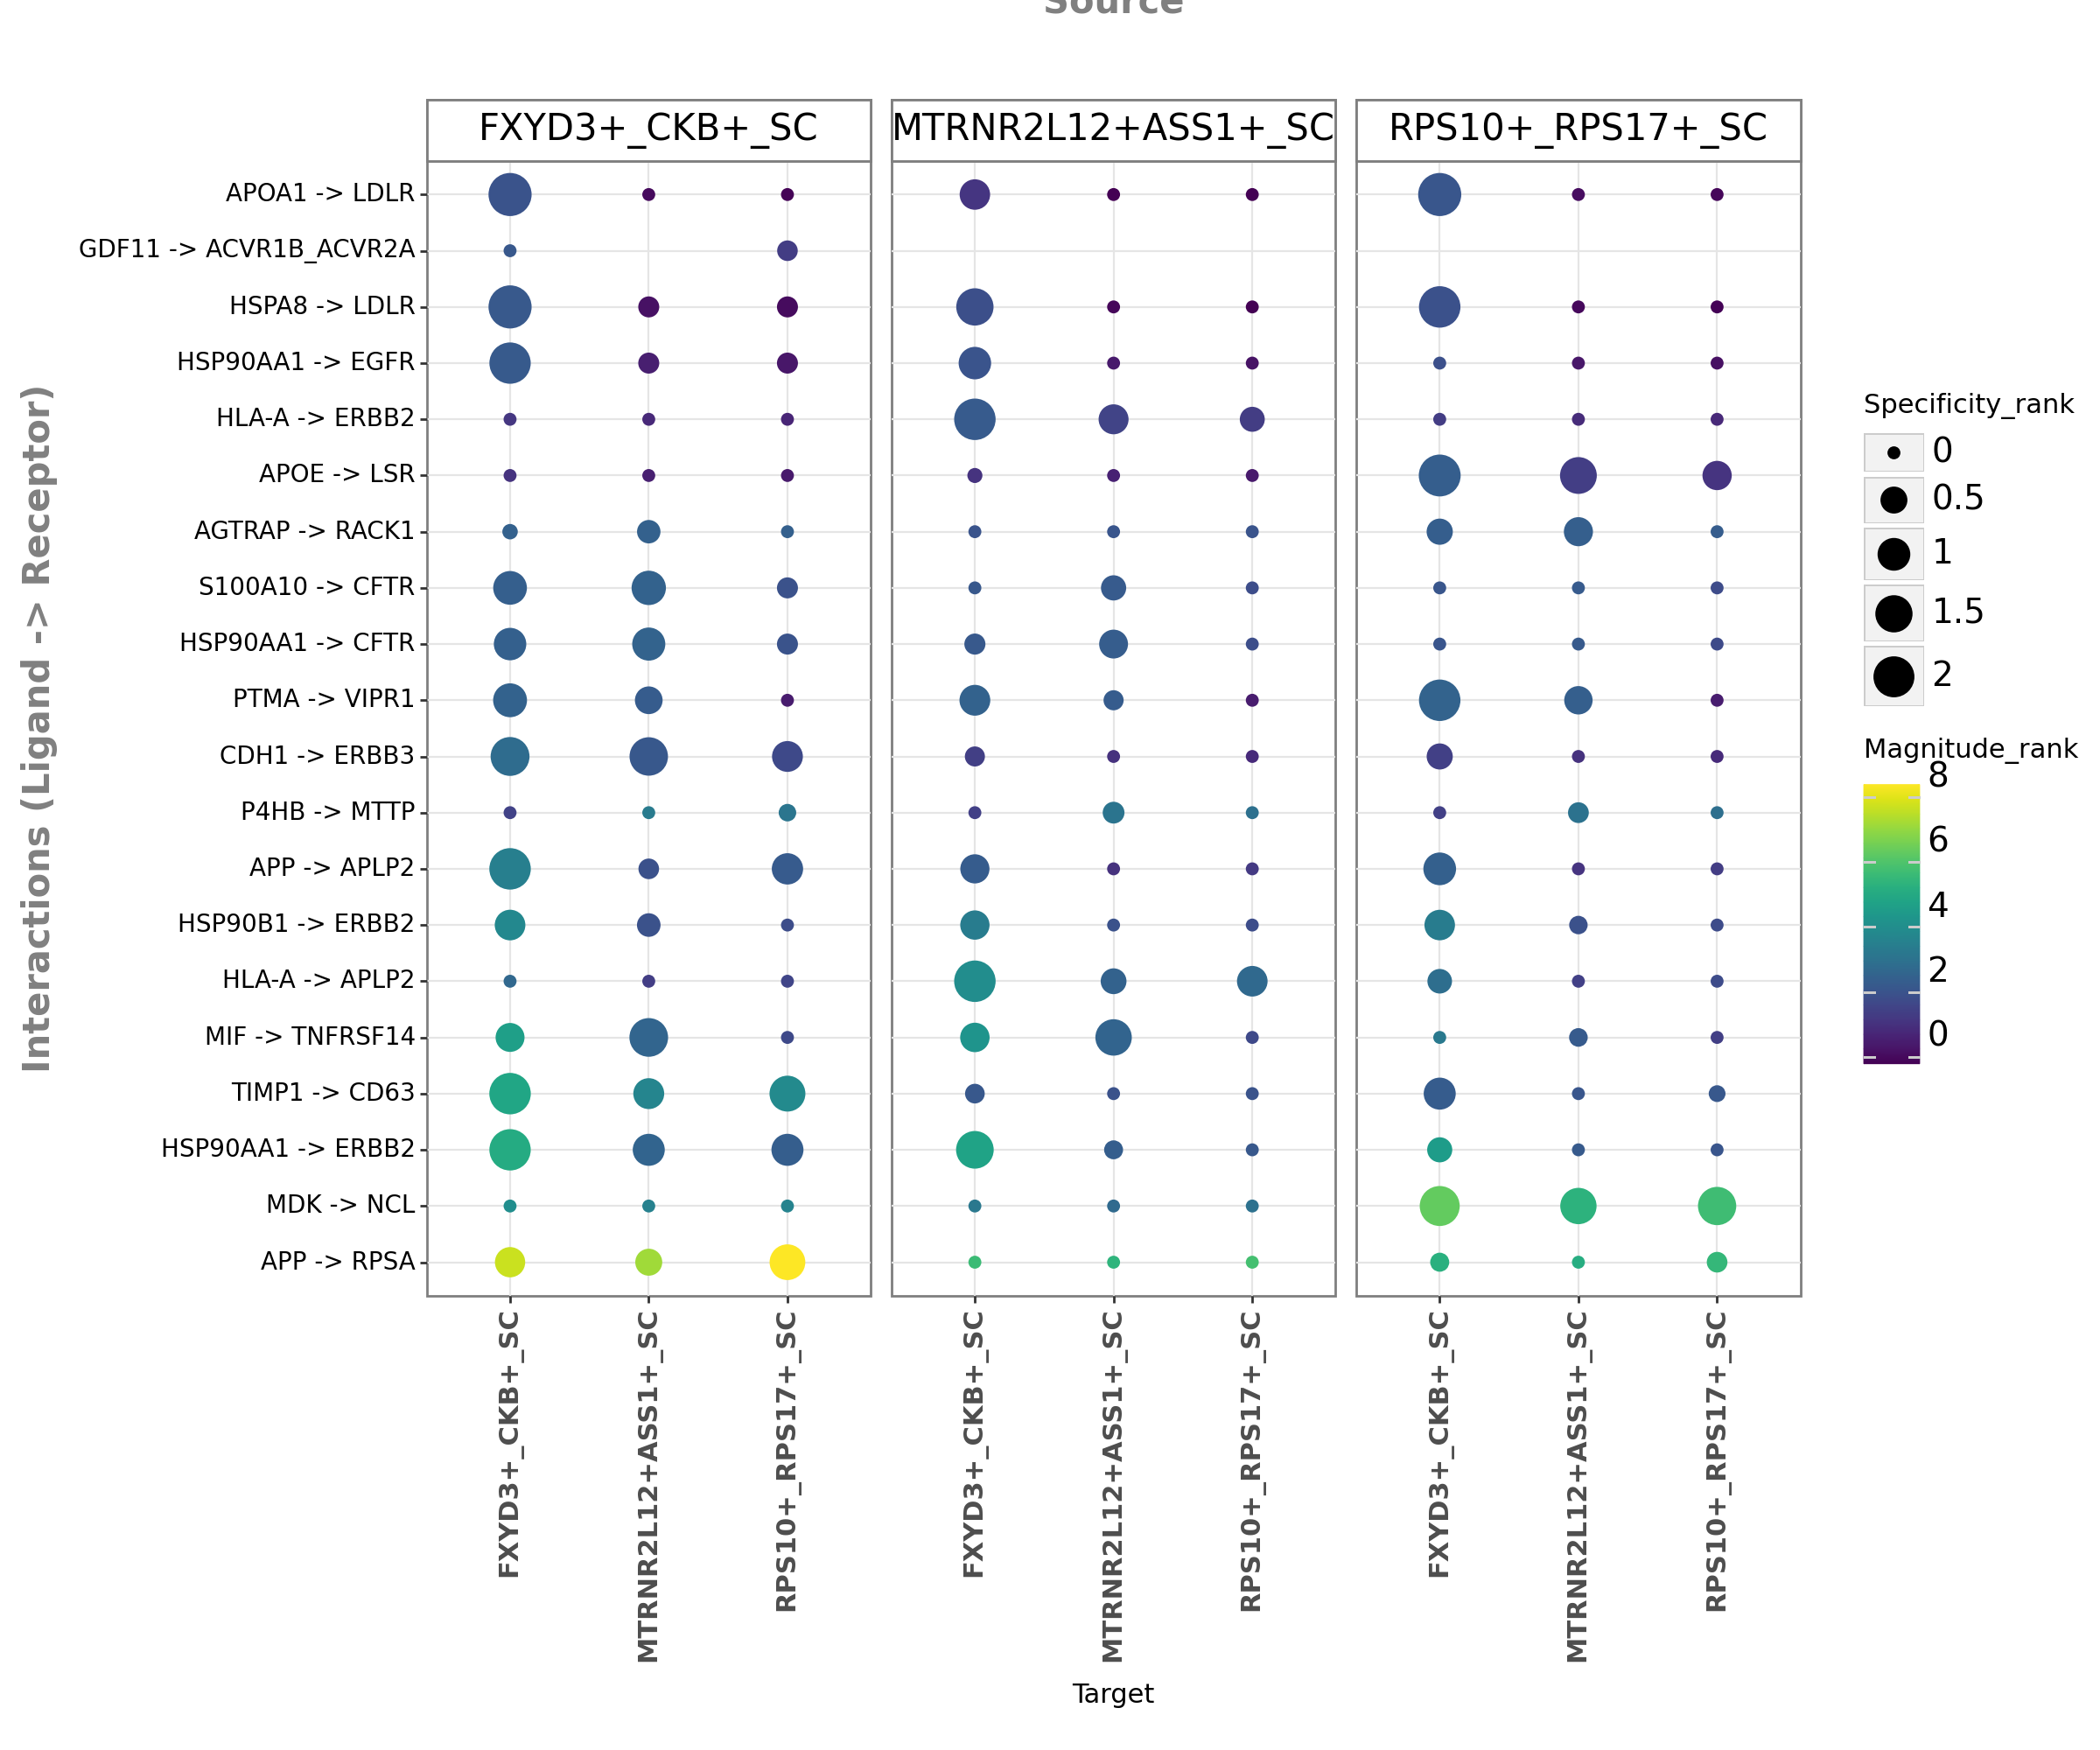

<Figure Size: (1200 x 1000)>

In [22]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['FXYD3+_CKB+_SC', 'MTRNR2L12+ASS1+_SC', 'RPS10+_RPS17+_SC'],
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(12, 10)
             )